In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import html5lib
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from functions import *

In [53]:
pd.options.mode.chained_assignment = None 
driver = webdriver.Chrome(options=Options())
driver.get("https://understat.com/team/Real_Madrid/2022")
html = driver.page_source

In [56]:
data = pd.read_html(html)
situations_data = data[0]
situations_data

,№,Situation,Sh,G,ShA,GA,xG,xGA,xGD,xG/Sh,xGA/Sh
0,1,Open play,271,29,163,11,32.98+3.98,14.33+3.33,18.65,0.12,0.09
1,2,From corner,51,5,42,1,3.89-1.11,3.29+2.29,0.60,0.08,0.08
2,3,Set piece,21,1,11,1,1.95+0.95,0.75-0.25,1.20,0.09,0.07
3,4,Direct Freekick,18,2,5,0,1.38-0.62,0.41+0.41,0.97,0.08,0.08
4,5,Penalty,10,7,4,4,7.43+0.43,2.97-1.03,4.46,0.74,0.74


In [48]:
situations_data.xG = situations_data.xG.apply(lambda xG: correctValue(xG))
situations_data.xGA = situations_data.xGA.apply(lambda xGA: correctValue(xGA))
situations_data

,№,Situation,Sh,G,ShA,GA,xG,xGA,xGD,xG/Sh,xGA/Sh
0,1,Open play,271,29,163,11,32.98,14.33,18.65,0.12,0.09
1,2,From corner,51,5,42,1,3.89,3.29,0.60,0.08,0.08
2,3,Set piece,21,1,11,1,1.95,0.75,1.20,0.09,0.07
3,4,Direct Freekick,18,2,5,0,1.38,0.41,0.97,0.08,0.08
4,5,Penalty,10,7,4,4,7.43,2.97,4.46,0.74,0.74


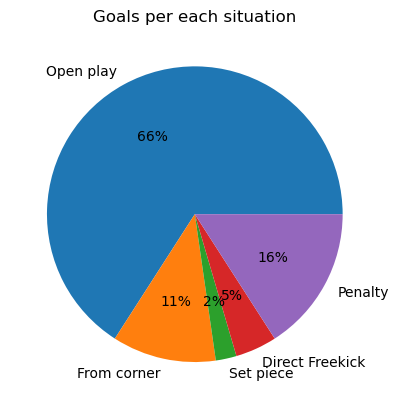

In [35]:
plt.pie(situations_data.G,labels=situations_data.Situation,autopct='%1.0f%%')
plt.title("Goals per each situation")
plt.show()

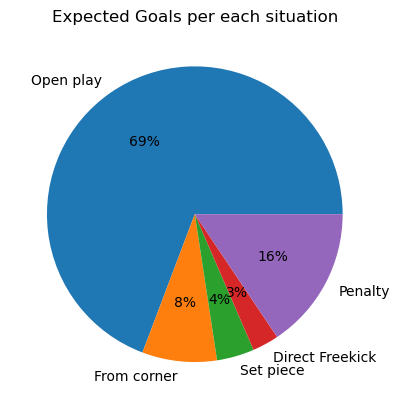

In [34]:
plt.pie(situations_data.xG,labels=situations_data.Situation,autopct='%1.0f%%')
plt.title("Expected Goals per each situation")
plt.show()

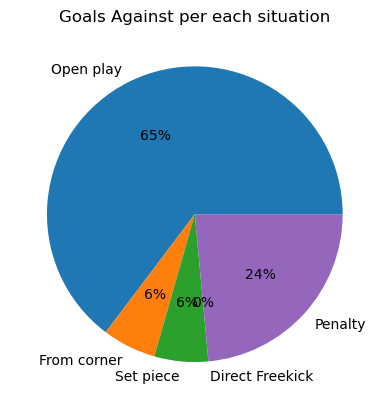

In [36]:
plt.pie(situations_data.GA,labels=situations_data.Situation,autopct='%1.0f%%')
plt.title("Goals Against per each situation")
plt.show()

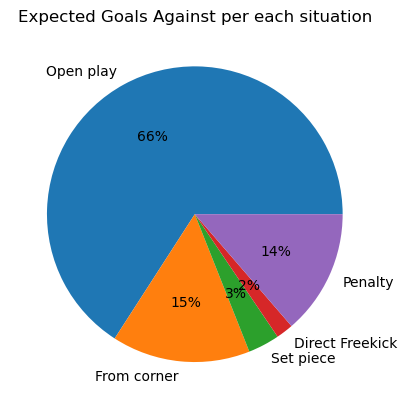

In [38]:
plt.pie(situations_data.xGA,labels=situations_data.Situation,autopct='%1.0f%%')
plt.title("Expected Goals Against per each situation")
plt.show()

In [104]:
players_data = pd.DataFrame(data[1]).dropna()
players_data.xG = players_data.xG.apply(lambda xG: correctValue(xG))
players_data.xA = players_data.xA.apply(lambda xA: correctValue(xA))
players_data.xG = players_data.xG.astype(float)
players_data.xA = players_data.xA.astype(float)
players_data["Efficiency"] = players_data.G - players_data.xG

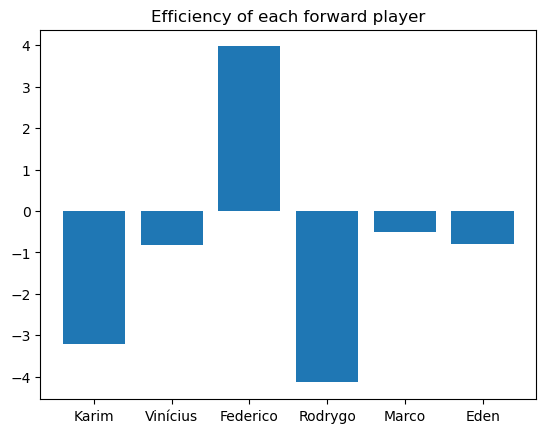

In [105]:
forward_players = players_data[players_data.Pos.str.contains('F')]
forward_players.Player = forward_players.Player.apply(lambda x: x.split()[0])
plt.bar(forward_players.Player,forward_players.Efficiency)
plt.title("Efficiency of each forward player")
plt.show()